<center>
<img src="../../img/ods_stickers.jpg">
## Open Machine Learning Course
<center>Author: [Yury Kashnitsky](https://www.linkedin.com/in/festline/), data scientist @ Mail.Ru Group <br>
Translated and edited by Sergey Isaev, Artem Trunov, Anastasia Manokhina, and [Yuanyuan Pao](https://www.linkedin.com/in/yuanyuanpao/) <br>All content is distributed under the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license.

# <center> Assignment #1
## <center>  Exploratory data analysis with Pandas


**In this task you should use Pandas to answer a few questions about the [Adult](https://archive.ics.uci.edu/ml/datasets/Adult) dataset. (You don't have to download the data – it's already  in the repository). Choose the answers in the [web-form](https://docs.google.com/forms/d/1ws9mchvdVGRyva_y_cPjASED8ATZTOsQFKfimohNaFE).**

Unique values of all features (for more information, please see the links above):
- `age`: continuous.
- `workclass`: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- `fnlwgt`: continuous.
- `education`: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- `education-num`: continuous.
- `marital-status`: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- `occupation`: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- `relationship`: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- `race`: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- `sex`: Female, Male.
- `capital-gain`: continuous.
- `capital-loss`: continuous.
- `hours-per-week`: continuous.
- `native-country`: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.   
- `salary`: >50K,<=50K

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max.columns', 100)
# to draw pictures in jupyter notebook
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10, 8)

In [2]:
data = pd.read_csv('C:\\Users\\yurii\OneDrive\\PycharmProjects\\mlcourse_open\\data\\adult.data.csv')
data.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


**1. How many men and women (*sex* feature) are represented in this dataset?** 

In [6]:
# Your code here
print(data['sex'].value_counts())

data.groupby('sex')['age'].count()

Male      21790
Female    10771
Name: sex, dtype: int64


sex
Female    10771
Male      21790
Name: age, dtype: int64

**2. What is the average age (*age* feature) of women?**

In [16]:
# Your code here
females = data[lambda x: x.sex == 'Female']
print(females['age'].mean())
print(females['age'].sum()/len(females))


36.8582304336
36.8582304336


**3. What is the percentage of German citizens (*native-country* feature)?**

In [19]:
# Your code here
print(data['native-country'].value_counts(normalize=True)['Germany'])

print(len(data[lambda x: x['native-country'] == 'Germany'])/len(data))

0.00420748748503
0.004207487485028101


**4. Make a population histogram (*bar plot*) of people's education (*education* feature).**

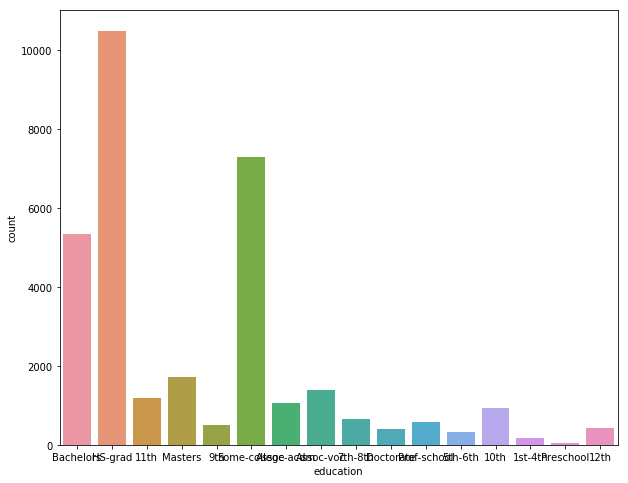

In [20]:
# Your code here
sns.countplot(x='education', data=data);

**5. What are the mean and standard deviation of age for those who earn more than 50K per year (*salary* feature) and those who earn less than 50K per year? **

In [22]:
# Your code here
data.groupby('salary')[['age']].describe()

age                                                    
          count       mean        std   min   25%   50%   75%   max
salary                                                             
<=50K   24720.0  36.783738  14.020088  17.0  25.0  34.0  46.0  90.0
>50K     7841.0  44.249841  10.519028  19.0  36.0  44.0  51.0  90.0

**6. Is it true that people who earn more than 50K have at least high school education? (*education – Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters* or *Doctorate* feature)**

In [28]:
# Your code here
data[lambda x: (x.salary == '>50K') & (~x.education.isin(['Bachelors', 'Prof-school', 'Assoc-acdm', 'Assoc-voc', 'Masters', 'Doctorate']))]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
10,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K
27,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
38,31,Private,84154,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,?,>50K
55,43,Private,237993,Some-college,10,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States,>50K
67,53,Private,169846,HS-grad,9,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,>50K
68,49,Self-emp-inc,191681,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,>50K
84,44,Private,343591,HS-grad,9,Divorced,Craft-repair,Not-in-family,White,Female,14344,0,40,United-States,>50K
86,49,Local-gov,268234,HS-grad,9,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
97,37,Private,202683,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,48,United-States,>50K


**7. Display age statistics for each race (*race* feature) and each gender (*sex* feature). Use *groupby()* and *describe()*. Find the maximum age of men of *Amer-Indian-Eskimo* race.**

In [29]:
# Your code here
data.groupby('race')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
race,,,,,,,,
Amer-Indian-Eskimo,311.0,37.173633,12.447130,17.0,28.0,35.0,45.5,82.0
Asian-Pac-Islander,1039.0,37.746872,12.825133,17.0,28.0,36.0,45.0,90.0
Black,3124.0,37.767926,12.759290,17.0,28.0,36.0,46.0,90.0
Other,271.0,33.457565,11.538865,17.0,25.0,31.0,41.0,77.0
White,27816.0,38.769881,13.782306,17.0,28.0,37.0,48.0,90.0


**8. Among whom is the proportion of those who earn a lot (>50K) greater: married or single men (*marital-status* feature)? Consider as married those who have a *marital-status* starting with *Married* (Married-civ-spouse, Married-spouse-absent or Married-AF-spouse), the rest are considered bachelors.**

In [34]:
# Your code here

data['is_married'] = data['marital-status'].apply(lambda x: x in ['Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse'])
pd.crosstab(data['is_married'], data['salary'])

salary,<=50K,>50K
is_married,,
False,16039,1105
True,8681,6736


**9. What is the maximum number of hours a person works per week (*hours-per-week* feature)? How many people work such a number of hours, and what is the percentage of those who earn a lot (>50K) among them?**

In [39]:
# Your code here
max_hours = data['hours-per-week'].max()

data[lambda x: x['hours-per-week'] == max_hours]['salary'].value_counts(normalize=True)

<=50K    0.705882
>50K     0.294118
Name: salary, dtype: float64

**10. Count the average time of work (*hours-per-week*) for those who earn a little and a lot (*salary*) for each country (*native-country*). What will these be for Japan?**

In [41]:
# Your code here
data.groupby(['native-country','salary'])['hours-per-week'].describe()

count       mean        std   min    25%  \
native-country             salary                                               
?                          <=50K     437.0  40.164760  12.817002   1.0  40.00   
                           >50K      146.0  45.547945  10.202827   8.0  40.00   
Cambodia                   <=50K      12.0  41.416667   3.088346  40.0  40.00   
                           >50K        7.0  40.000000   0.000000  40.0  40.00   
Canada                     <=50K      82.0  37.914634  13.012056   8.0  32.75   
                           >50K       39.0  45.641026  12.066673  20.0  40.00   
China                      <=50K      55.0  37.381818  11.439844   1.0  36.00   
                           >50K       20.0  38.900000  10.125008  10.0  38.00   
Columbia                   <=50K      57.0  38.684211   8.610952   5.0  40.00   
                           >50K        2.0  50.000000   0.000000  50.0  50.00   
Cuba                       <=50K      70.0  37.985714   9.960055   5.0  40.00   
                           >50K       25.0  42.440000  12.453514  14.0  40.00   
Dominican-Republic         <=50K      68.0  42.338235  11.121594  22.0  40.00   
                           >50K        2.0  47.000000   9.899495  40.0  43.50   
Ecuador                    <=50K      24.0  38.041667  10.251105  22.0  30.00   
                           >50K        4.0  48.750000   2.500000  45.0  48.75   
El-Salvador                <=50K      97.0  36.030928   9.396867   3.0  32.00   
                           >50K        9.0  45.000000   7.071068  35.0  40.00   
England                    <=50K      60.0  40.483333  15.177472   7.0  40.00   
                           >50K       30.0  44.533333  11.072592  20.0  40.00   
France                     <=50K      17.0  41.058824  12.401969  15.0  40.00   
                           >50K       12.0  50.750000  16.360290  40.0  40.00   
Germany                    <=50K      93.0  39.139785  12.121299   6.0  38.00   
                           >50K       44.0  44.977273  11.944618   8.0  40.00   
Greece                     <=50K      21.0  41.809524  16.857103   4.0  40.00   
                           >50K        8.0  50.625000  11.783008  35.0  40.00   
Guatemala                  <=50K      61.0  39.360656   6.570218  18.0  40.00   
                           >50K        3.0  36.666667   5.773503  30.0  35.00   
Haiti                      <=50K      40.0  36.325000  11.943000  10.0  30.00   
                           >50K        4.0  42.750000   9.142392  35.0  38.75   
...                                    ...        ...        ...   ...    ...   
Mexico                     >50K       33.0  46.575758  10.917390  30.0  40.00   
Nicaragua                  <=50K      32.0  36.093750   8.663454  11.0  30.00   
                           >50K        2.0  37.500000   3.535534  35.0  36.25   
Outlying-US(Guam-USVI-etc) <=50K      14.0  41.857143  10.747859  24.0  36.25   
Peru                       <=50K      29.0  35.068966  11.609513   4.0  28.00   
                           >50K        2.0  40.000000   0.000000  40.0  40.00   
Philippines                <=50K     137.0  38.065693  11.265646   8.0  40.00   
                           >50K       61.0  43.032787   8.445842  35.0  40.00   
Poland                     <=50K      48.0  38.166667  12.237600   3.0  40.00   
                           >50K       12.0  39.000000   9.779385  10.0  40.00   
Portugal                   <=50K      33.0  41.939394   9.062075  30.0  40.00   
                           >50K        4.0  41.500000   5.972158  36.0  39.00   
Puerto-Rico                <=50K     102.0  38.470588   9.745988   6.0  36.00   
                           >50K       12.0  39.416667  11.057357   8.0  40.00   
Scotland                   <=50K       9.0  39.444444   9.166667  20.0  40.00   
                           >50K        3.0  46.666667  11.547005  40.0  40.00   
South                      <=50K      64.0  40.156250  16.831771   4